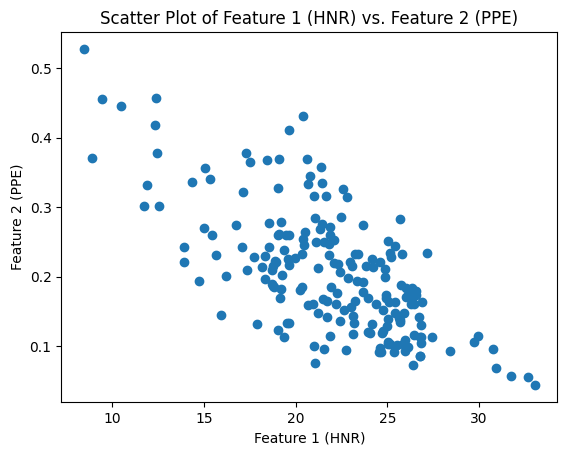

In [22]:
#A1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data from the Excel file
data = pd.read_excel('Parkisons Dataset 1 Final.xlsx')

# Extract the values for Feature A and Feature B
feature_1 = data['HNR']
feature_2 = data['PPE']

# Create a scatter plot
plt.scatter(feature_1, feature_2)

# Add labels and a title
plt.xlabel("Feature 1 (HNR)")
plt.ylabel("Feature 2 (PPE)")
plt.title("Scatter Plot of Feature 1 (HNR) vs. Feature 2 (PPE)")

# Show the plot
plt.show()

<ipython-input-31-1175f302952b>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Coefficients: [-0.01402791]
Mean squared error: 0.00
Coefficient of determination: 0.43


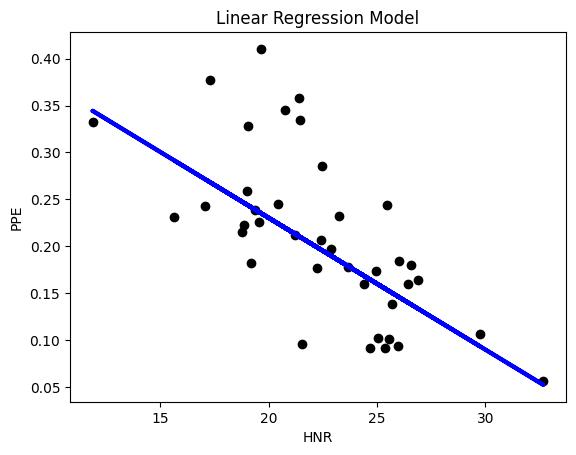

In [31]:
#A2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming you've already loaded and cleaned your data
data = pd.read_excel('Parkisons Dataset 1 Final.xlsx')
data.isna().sum()
data.fillna(data.mean(), inplace=True)

# Define the independent and dependent variables
X = data[['HNR']]  # Independent variable
y = data['PPE']   # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients:", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is a perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel("HNR")
plt.ylabel("PPE")
plt.title("Linear Regression Model")

plt.show()

In [35]:
#A3

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'X' is your feature data and 'y' are continuous labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error (or another appropriate regression metric)
mse = mean_squared_error(y_test, y_pred)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error: {mse}")


Coefficients: [2.]
Intercept: 8.0
Mean Squared Error: 0.0


In [53]:
#A4

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load your dataset for binary classification
data = pd.read_excel('Parkisons Dataset 1 Final.xlsx')

# Assuming 'X' is your feature data, and 'PPE' is the continuous target variable
X = data.drop('name', axis=1)
threshold = 0.5  # Define a threshold for binary classification
y = (data['PPE'] > threshold).astype(int)  # Convert to binary labels based on the threshold

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with increased max_iter and a different solver
model = LogisticRegression(solver='liblinear', max_iter=1000)

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")


Test Set Accuracy: 1.0


In [42]:
#A5

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load your dataset
data = pd.read_excel('Parkisons Dataset 1 Final.xlsx')

# Assuming 'X' is your feature data and 'y' are the target values (continuous)
X = data.drop('name', axis=1)  # Adjust 'target_column' to the actual column name
y = data['DFA']  # Adjust 'target_column' to the actual column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
regression_tree = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
regression_tree.fit(X_train, y_train)

# Predict on the test set
tree_predictions = regression_tree.predict(X_test)

# Evaluate the Decision Tree Regressor model
tree_mse = mean_squared_error(y_test, tree_predictions)
print("Decision Tree Regressor Mean Squared Error:", tree_mse)

# Feature scaling for k-NN regressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the k-NN Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit the model to the scaled training data
knn_regressor.fit(X_train_scaled, y_train)

# Predict on the scaled test set
knn_predictions = knn_regressor.predict(X_test_scaled)

# Evaluate the k-NN Regressor model
knn_mse = mean_squared_error(y_test, knn_predictions)
print("k-NN Regressor Mean Squared Error:", knn_mse)


Decision Tree Regressor Mean Squared Error: 8.29286773846156e-05
k-NN Regressor Mean Squared Error: 0.0008159727880461539
